In [ ]:
!pip install opencv

ERROR: Could not find a version that satisfies the requirement opencv (from versions: none)
ERROR: No matching distribution found for opencv


## **Loading Libraries**

In [ ]:
import cv2
import matplotlib.pyplot as plt
import requests
import numpy as np

## **With Custom SIFT Module**

In [ ]:
import sys
sys.path.append("/content/drive/MyDrive/Colab Notebooks")
import SIFT

In [ ]:
def display_image(image, title='Image', cmap='gray'):          # This function is used to display the image.

    fig, ax = plt.subplots(figsize=(6, 5))
    ax.imshow(image, cmap=cmap)
    ax.set_title(title)
    ax.axis('off')
    plt.show()

In [ ]:
# Load an Image
url1 = "https://raw.githubusercontent.com/samrudh/Panorama-Effect-Image-Stitching/master/test_images/img1_1.png"
url2 = "https://raw.githubusercontent.com/samrudh/Panorama-Effect-Image-Stitching/master/test_images/img1_2.png"

In [ ]:
# We can't directly open image using Url first we need donwload it.
response1 = requests.get(url1)
response2 = requests.get(url2)

image1 = cv2.imdecode(np.frombuffer(response1.content, np.uint8), cv2.IMREAD_COLOR)
image2 = cv2.imdecode(np.frombuffer(response2.content, np.uint8), cv2.IMREAD_COLOR)

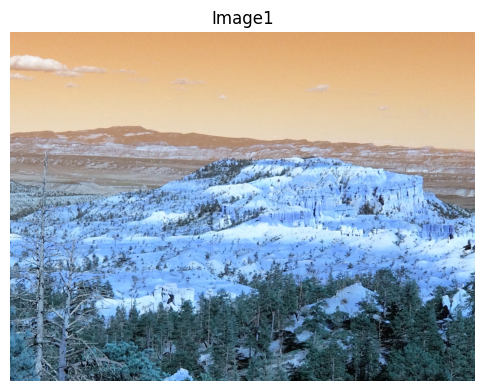

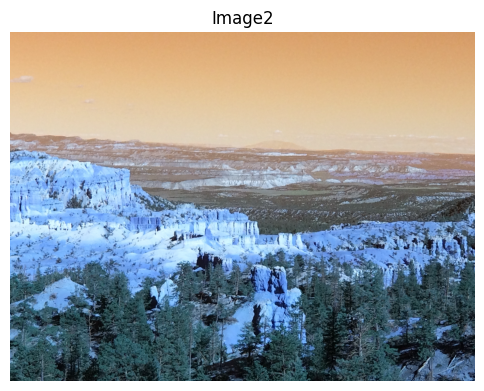

In [ ]:
display_image(image1,"Image1")
display_image(image2,"Image2")

In [ ]:
# Convert to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

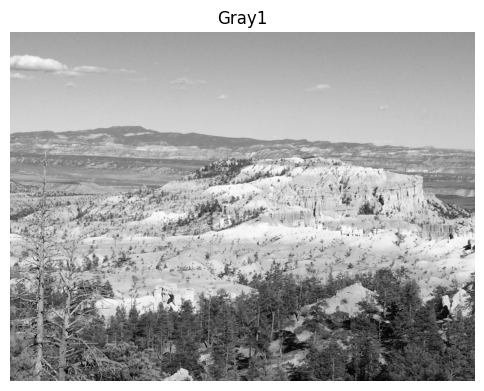

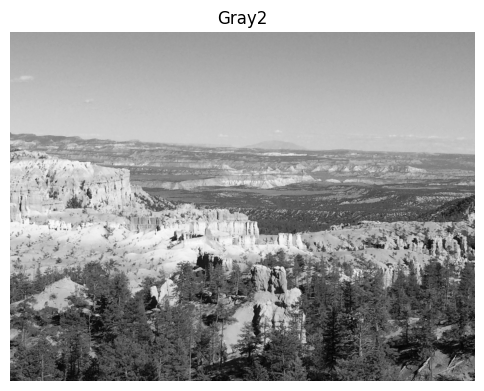

In [ ]:
display_image(gray1,"Gray1")
display_image(gray2,"Gray2")

In [ ]:
# Check if images were loaded properly
if gray1 is None or gray2 is None:
    raise ValueError("One or both images could not be loaded.")

# Detect keypoints and descriptors
keypoints1, descriptors1 = SIFT.computeKeypointsAndDescriptors(gray1)
keypoints2, descriptors2 = SIFT.computeKeypointsAndDescriptors(gray2)

In [ ]:
# Initialize the Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2 , crossCheck = True)
# Match descriptors
matches = bf.match(descriptors1 , descriptors2)
# Sort matches based on distance
matches = sorted(matches,key = lambda x : x.distance)


In [ ]:
 # Extract matched keypoint locations
src_pts = np.float32([keypoints1[m.queryIdx ].pt for m in matches]).reshape (-1 , 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx ].pt for m in matches]).reshape (-1 , 1, 2)
# Compute homography using RANSAC
H , mask = cv2.findHomography(src_pts , dst_pts , cv2.RANSAC , 5.0)
 # Mask to keep only inlier matches
matches_mask = mask.ravel().tolist()


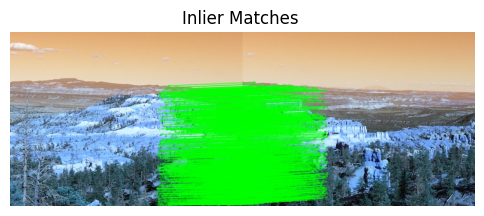

In [ ]:
# Draw only inlier matches using mask
matched_image = cv2.drawMatches ( image1 , keypoints1 , image2 , keypoints2 , matches , None ,
matchColor =(0 , 255 , 0) , # Green for inliers
singlePointColor = None ,
matchesMask = matches_mask , # Only inliers
flags=2)
# Display the image with inlier matches
display_image(matched_image,"Inlier Matches ")

## **With Using OpenCv SIFT**

In [ ]:
# Create a SIFT object
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints1, descriptors1 = sift.detectAndCompute(gray1, None)
keypoints2, descriptors2 = sift.detectAndCompute(gray2, None)


In [ ]:
# Initialize the Brute Force Matcher
bf = cv2.BFMatcher(cv2.NORM_L2 , crossCheck = True)
# Match descriptors
matches = bf.match(descriptors1 , descriptors2)
# Sort matches based on distance
matches = sorted(matches,key = lambda x : x.distance)


In [ ]:
 # Extract matched keypoint locations
src_pts = np.float32([keypoints1[m.queryIdx ].pt for m in matches]).reshape (-1 , 1, 2)
dst_pts = np.float32([keypoints2[m.trainIdx ].pt for m in matches]).reshape (-1 , 1, 2)
# Compute homography using RANSAC
H , mask = cv2.findHomography(src_pts , dst_pts , cv2.RANSAC , 5.0)
 # Mask to keep only inlier matches
matches_mask = mask.ravel().tolist()

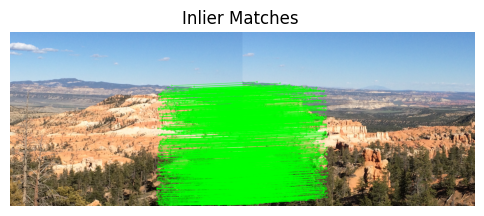

In [ ]:
# Draw only inlier matches using mask
matched_image = cv2.drawMatches ( image1 , keypoints1 , image2 , keypoints2 , matches , None ,
matchColor =(0 , 255 , 0) , # Green for inliers
singlePointColor = None ,
matchesMask = matches_mask , # Only inliers
flags=2)
# Display the image with inlier matches
display_image(matched_image,"Inlier Matches ")